In [20]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models

In [68]:
data = pd.read_csv('30 nov 1e data.csv', delimiter = ',')
voltage1 = np.array(data.iloc[:,4])
voltage2 = np.array(data.iloc[:,10])
time = np.array(data.iloc[:,3])

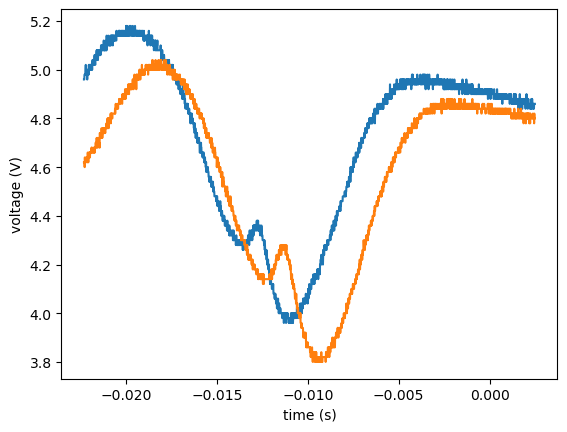

In [69]:
plt.plot(time, voltage1)
plt.plot(time, voltage2)
plt.xlabel('time (s)')
plt.ylabel('voltage (V)')
plt.show()

In [70]:
def gaussian(time, A, mu, sigma):
    return A* np.exp(-(time - mu)**2 / (2 * sigma**2))
def line(time, a, b):
    return a*time + b

In [71]:
gauss1 = models.Model(gaussian, prefix='p1_')
gauss2 = models.Model(gaussian, prefix='p2_')
linear_function = models.Model(line, name="lijn")

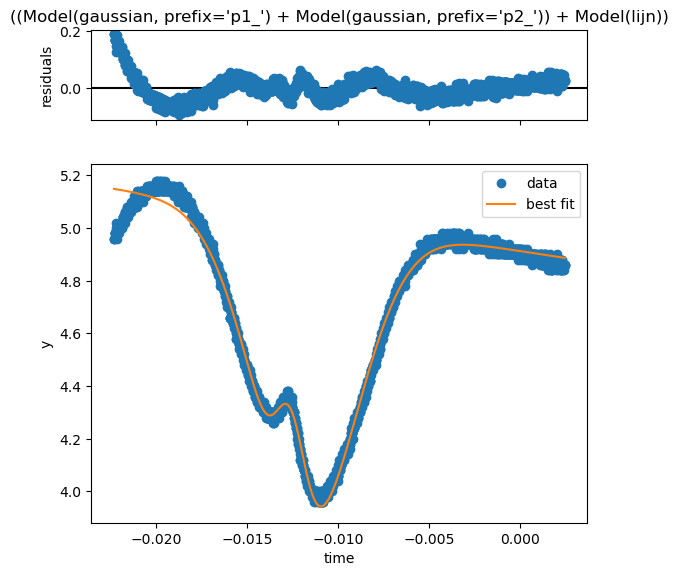

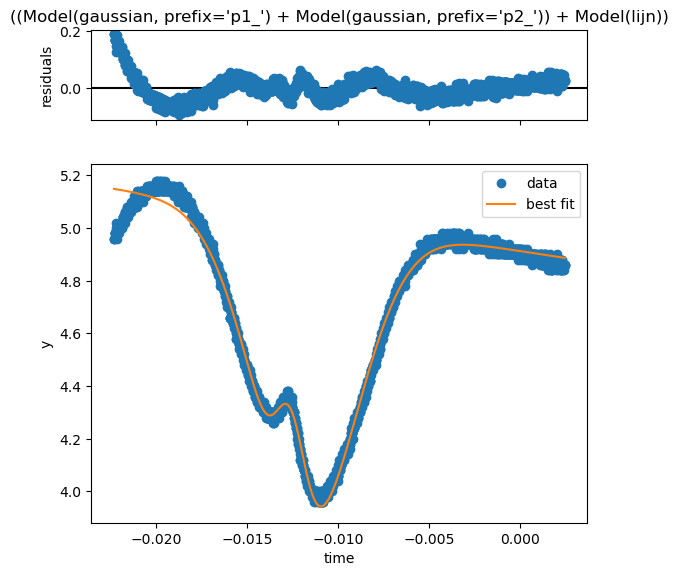

In [72]:
# curve1 = gauss1 + gauss2 + linear_function
# params = curve1.make_params(p1_A = -0.04, p1_mu=0.062, p1_sigma=0.001, p2_A =-0.4, p2_mu=0.064, p2_sigma=0.0015,a=-0.9,b=0.38)
# fit_curve = curve1.fit(voltage1, params,time=time )
curve1 = gauss1 + gauss2 + linear_function
params = curve1.make_params(p1_A = -1, p1_mu=-0.013, p1_sigma=0.001, p2_A = -1.2, p2_mu=-0.012, p2_sigma=0.003,a=-0.6,b=5.2)
fit_curve1 = curve1.fit(voltage1, params,time=time )

fit_curve1.plot()

In [73]:
fit_curve1

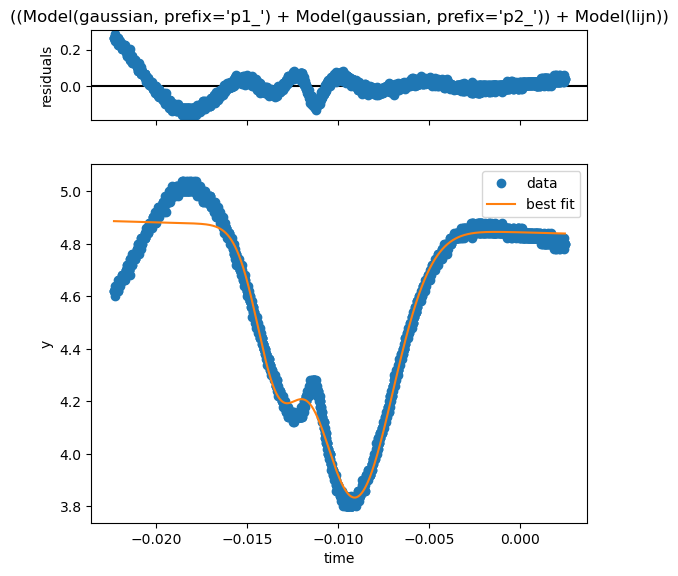

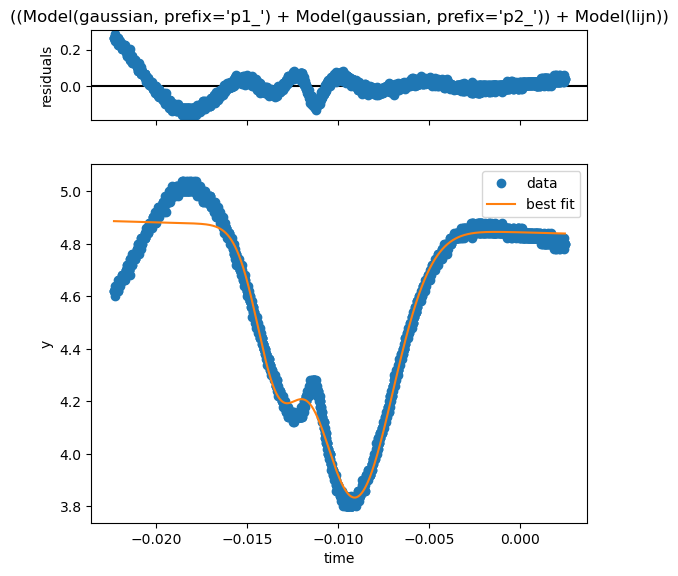

In [86]:

curve2 = gauss1 + gauss2 + linear_function
params2 = curve2.make_params(p1_A = -0.5, p1_mu=-0.013, p1_sigma=0.001, p2_A = -1, p2_mu=-0.009, p2_sigma=0.002,a=-2,b=4.8)
fit_curve2 = curve2.fit(voltage2, params2,time=time )

fit_curve2.plot()


In [84]:
fit_curve2

In [87]:
# omzetten naar frequentieas
delta_t = fit_curve2.params['p2_mu'].value - fit_curve2.params['p1_mu'].value
a = 172.4/delta_t
b = (-72-1770.884) - fit_curve1.params['p1_mu'].value*a

In [88]:
frequency = a*time + b

Text(0.5, 0, 'frequency in MHz in reference to voltage1')

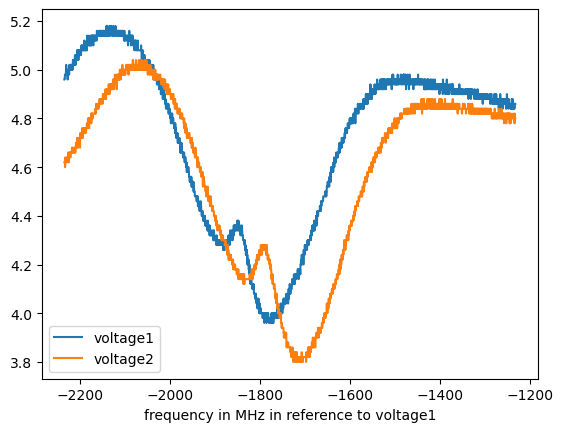

In [92]:
plt.plot(frequency, voltage1, label='voltage1')
plt.plot(frequency, voltage2, label='voltage2')
plt.legend(loc='lower left')
plt.xlabel('frequency in MHz in reference to voltage1')

In [94]:
delta_f = 0.5*(fit_curve2.params['p2_mu'].value - fit_curve1.params['p1_mu'].value)
print(delta_f)

0.001760457133551177
